C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Confusion Matrix is 
[[42 13]
 [ 9 79]]
Accuracy of the model is  84.61538461538461


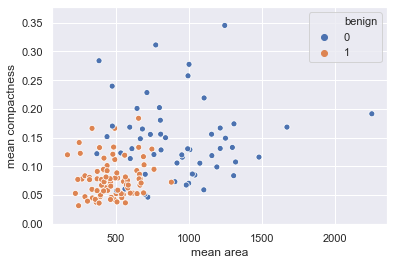

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is ")
print(mat)

acc = (mat[0][0] + mat[1][1])/sum(map(sum, mat))
acc = (acc*100)
print("Accuracy of the model is " ,acc)